<a href="https://colab.research.google.com/github/proteinphysiologylab/frustratometeR/blob/master/FrustratometeR_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Evolution and dynamics frustration**
In this workshop we will learn to calculate and analyze frustration patterns protein structures. For this we will use new functionalities of the frustratometer (R package). We will also analyze frustration in molecular dynamics simulations.

### **We are going to test the Frustratometer.**
We are going to install the minimum libraries to be able to run the **frustratometer** in colab!



In [1]:
#Install biopython and visualization
!pip install biopython py3Dmol
#Downgrade rpy para correr frustraR
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=318069 sha256=5722e10bbb9da42c2d7678ef00c5e26fc4da7ba7261b273ef8f2ef41b3a4bc04
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.5.5
    Uninstalling rpy2-3.5.5:
      Successfully uninstalled rpy2-3.5.5


Installing dependencies (this part takes around 40 mins)

In [2]:
!apt update -y
!apt install wget mc r-base python3 python3-pip pymol libmagick++-dev libcurl4-openssl-dev libssl-dev libgit2-dev -y
!apt install libcurl4-gnutls-dev libxml2-dev -y
!python3 -m pip install numpy biopython leidenalg
!apt install software-properties-common -y
!wget https://salilab.org/modeller/9.25/modeller_9.25-1_amd64.deb
!env KEY_MODELLER=XXX dpkg -i modeller_9.25-1_amd64.deb
!Rscript -e "install.packages('ggrepel')"
!Rscript -e "install.packages('igraph')"
!Rscript -e "install.packages('dplyr')"
!Rscript -e "install.packages('FactoMineR')"
!Rscript -e "install.packages('Hmisc')"`
!Rscript -e "install.packages('argparse')"
!Rscript -e "install.packages('leiden')"
!Rscript -e "install.packages('magick')"
!Rscript -e "options(timeout=9999999)"
!Rscript -e "devtools::install_github('proteinphysiologylab/frustratometeR')"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
../inst/include/Eigen/src/Householder/HouseholderSequence.h:360:7:   required from ‘typename Eigen::internal::matrix_type_times_scalar_type<typename Eigen::internal::traits<Eigen::HouseholderSequence<VectorsType, CoeffsType, Side> >::Scalar, OtherDerived>::Type Eigen::HouseholderSequence<VectorsType, CoeffsType, Side>::operator*(const Eigen::MatrixBase<OtherDerived>&) const [with OtherDerived = Eigen::Map<Eigen::Matrix<double, -1, 1>, 0, Eigen::Stride<0, 0> >; VectorsType = Eigen::Matrix<double, -1, -1>; CoeffsType = Eigen::Matrix<double, -1, 1>; int Side = 1; typename Eigen::internal::matrix_type_times_scalar_type<typename Eigen::internal::traits<Eigen::HouseholderSequence<VectorsType, CoeffsType, Side> >::Scalar, OtherDerived>::Type = Eigen::Matrix<double, -1, 1>]’
fastLm.cpp:101:67:   required from here
../inst/include/Eigen/src/Core/CoreEvaluators.h:960:8: warning: ignoring attributes on template argument ‘Eigen::in

Now, we are going to **donwload two proteins** which are two hemoglobins to which we are going to calculate the frustration at the contact level (mutational and configurational). The files will be stored in /content/

In [5]:
#Loading the R extension interactively
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [6]:
!wget http://www.rcsb.org/pdb/files/1fhj.pdb -O 1fhj.pdb
!wget http://www.rcsb.org/pdb/files/2dn1.pdb -O 2dn1.pdb

URL transformed to HTTPS due to an HSTS policy
--2023-05-04 16:34:41--  https://www.rcsb.org/pdb/files/1fhj.pdb
Resolving www.rcsb.org (www.rcsb.org)... 128.6.159.248
Connecting to www.rcsb.org (www.rcsb.org)|128.6.159.248|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://files.rcsb.org/download/1fhj.pdb [following]
--2023-05-04 16:34:42--  https://files.rcsb.org/download/1fhj.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.158.66
Connecting to files.rcsb.org (files.rcsb.org)|128.6.158.66|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1fhj.pdb’

1fhj.pdb                [  <=>               ] 447.48K  1.12MB/s    in 0.4s    

2023-05-04 16:34:42 (1.12 MB/s) - ‘1fhj.pdb’ saved [458217]

URL transformed to HTTPS due to an HSTS policy
--2023-05-04 16:34:42--  https://www.rcsb.org/pdb/files/2dn1.pdb
Resolving www.rcsb.org (www.rcsb.org)... 128.6.159.248
Conne

####Visualization of the structures

In [7]:
#Visualizing the heterotetramer
import py3Dmol
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read the PDB files of chain B and C
view.addModel(open('/content/1fhj.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures 
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style for chain B and C
view.setStyle({'chain':'A'},{'cartoon': {'color':'purple'}})
view.setStyle({'chain':'B'},{'cartoon': {'color':'green'}})
view.setStyle({'chain':'C'},{'cartoon': {'color':'yellow'}})
view.setStyle({'chain':'D'},{'cartoon': {'color':'blue'}})
#And we finally visualize the structures using the command below
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

####Frustration calculation in heterocomplexes

We will generate the **R script** to frustrate all the pdbs out there **in a directory**!




In [8]:
#create a folder to save the frustration results (/content/Results)
!mkdir Results

In [9]:
%%R
library(frustratometeR)

dir_frustration(PdbsDir = "/content/", Mode = "configurational", ResultsDir ="/content/Results/")


    consider that it could be called from a Python process. This
    results in a quasi-obligatory segfault when rpy2 is evaluating
    R code using it. On the hand, rpy2 is accounting for the
    fact that it might already be running embedded in a Python
    process. This is why:
    - Python -> rpy2 -> R -> reticulate: crashes
    - R -> reticulate -> Python -> rpy2: works

    The issue with reticulate is tracked here:
    https://github.com/rstudio/reticulate/issues/208
    -----------------------------Filtering-----------------------------
-----------------------------Preparing files-----------------------------
-----------------------------Setting options-----------------------------
-----------------------------Calculating-----------------------------
-----------------------------Reorganization-----------------------------
-----------------------------Images-----------------------------
5Adens plot is stored in /content/Results/1fhj.done/Images/1fhj_configurational.png_5Adens.p

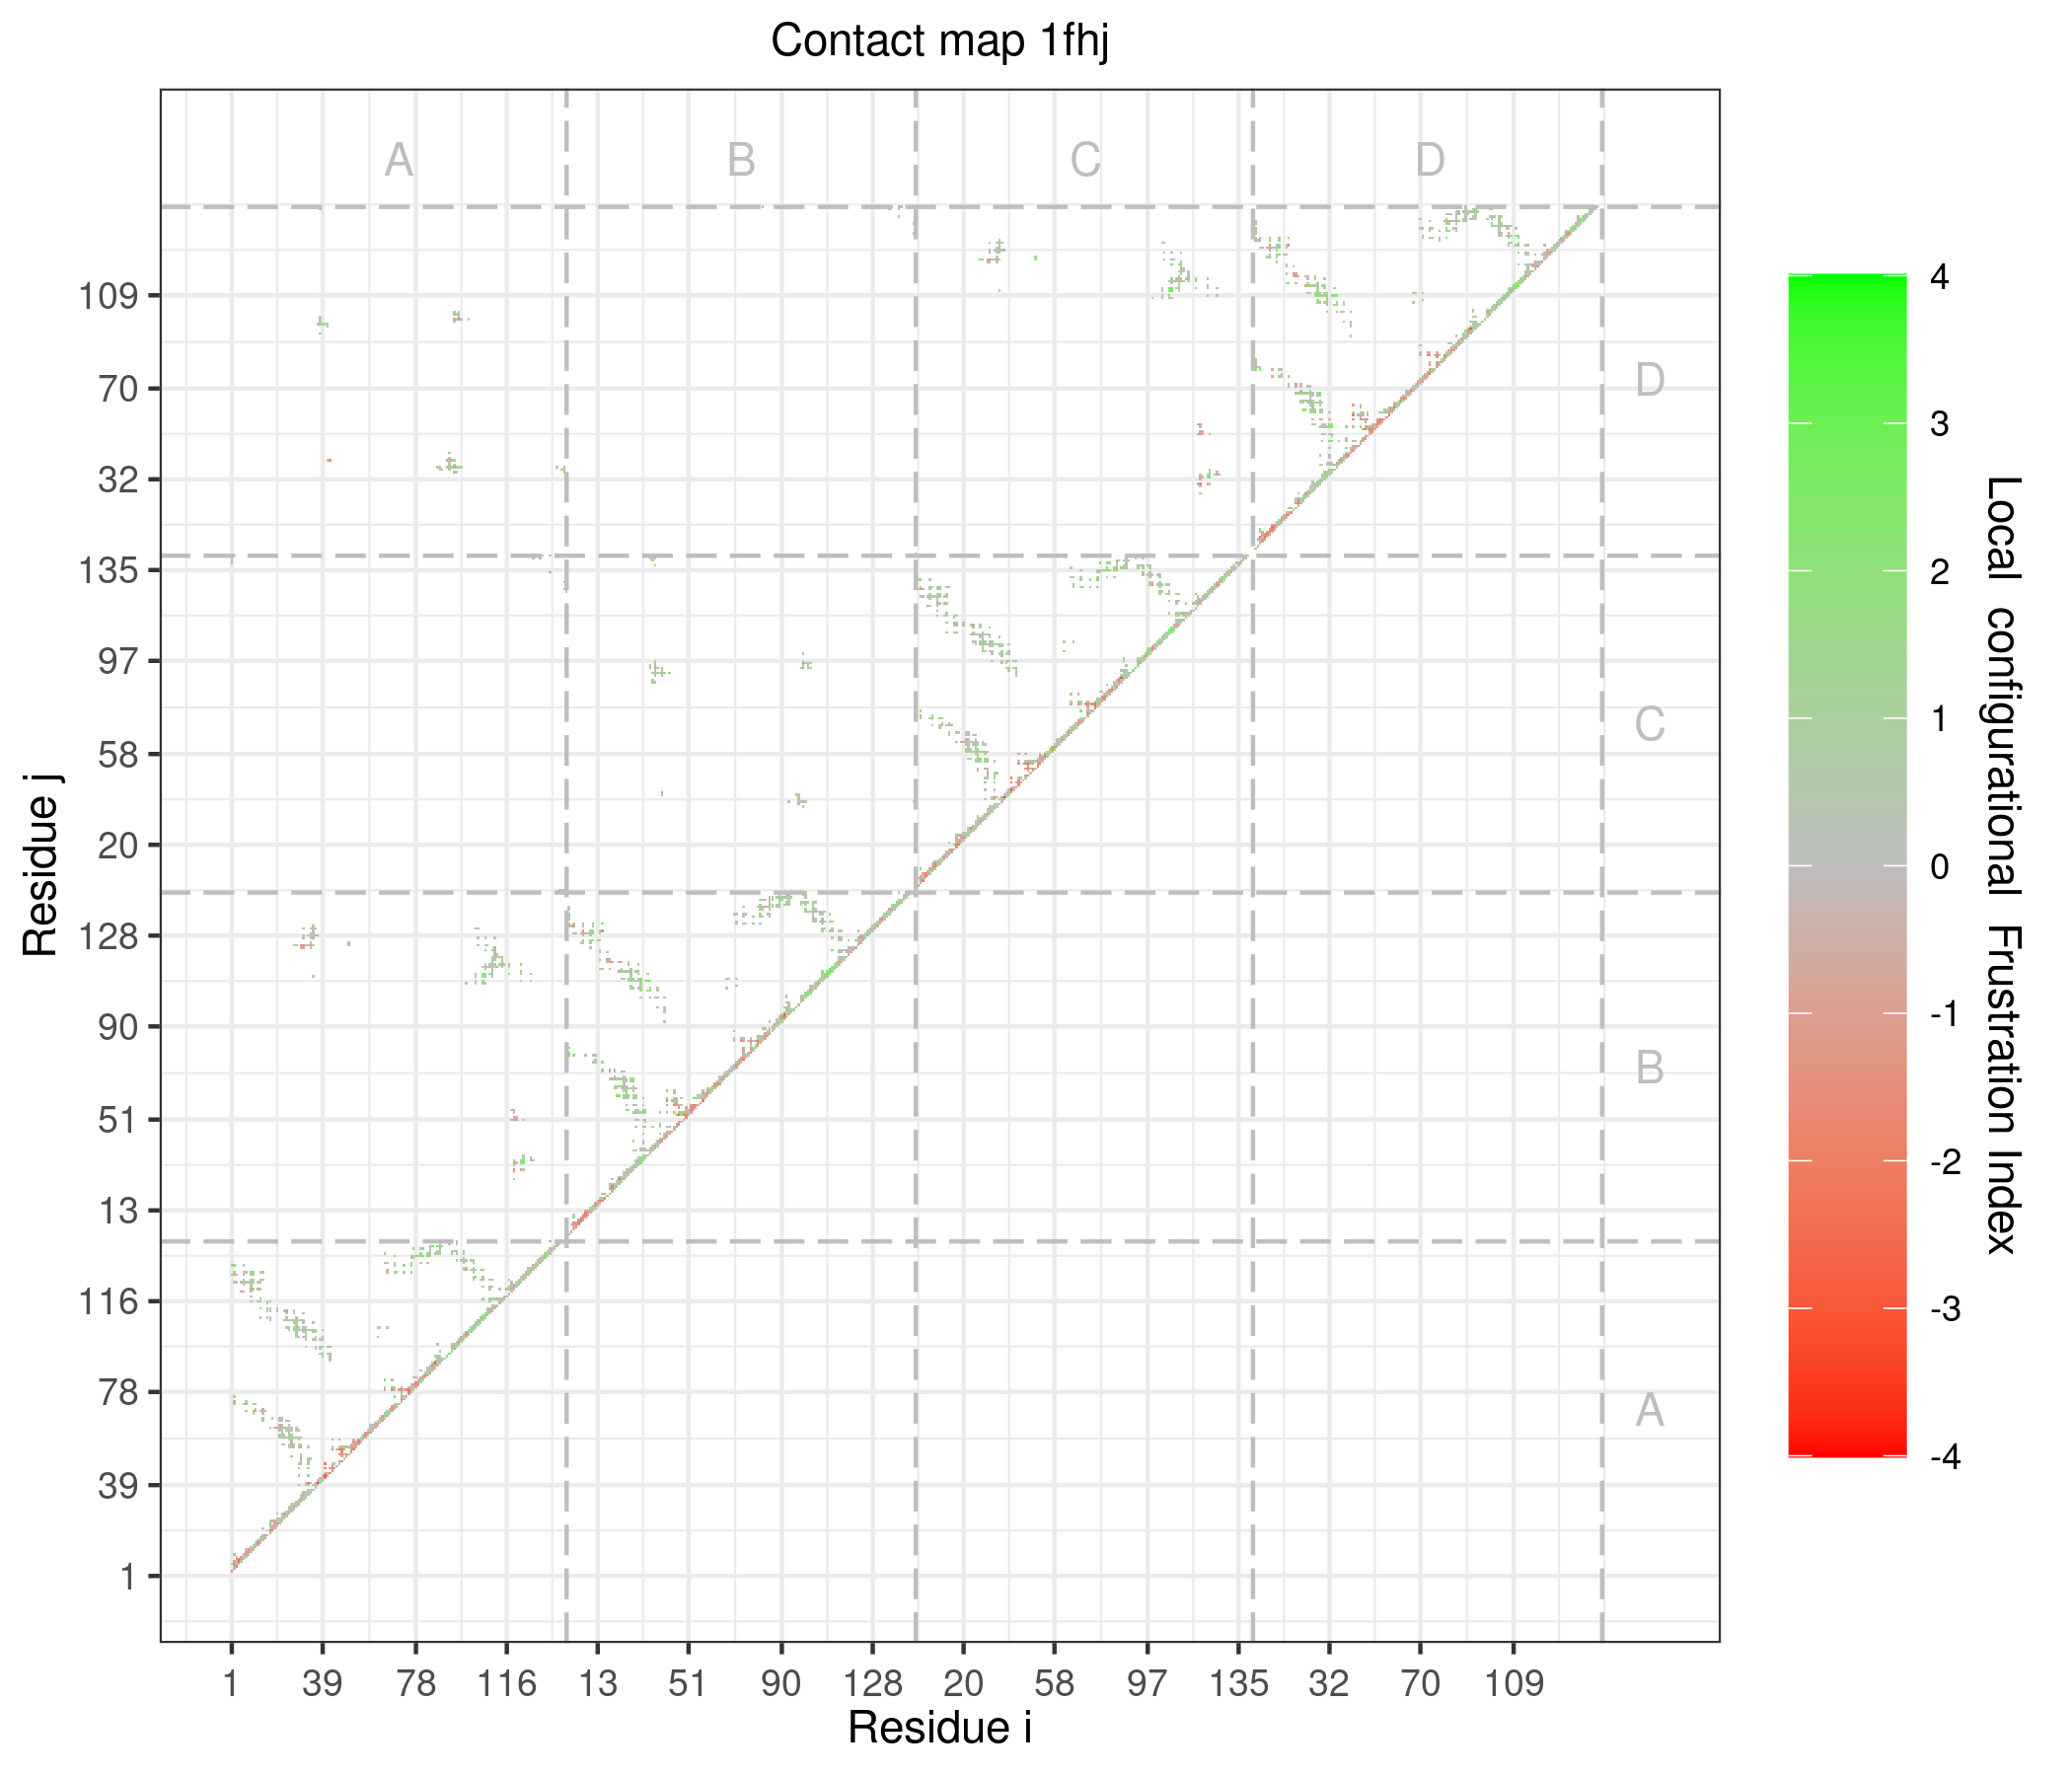

In [ ]:
from IPython.display import Image
Image('/content/Results/1fhj.done/Images/1fhj_configurational_map.png', width=600, height=400)

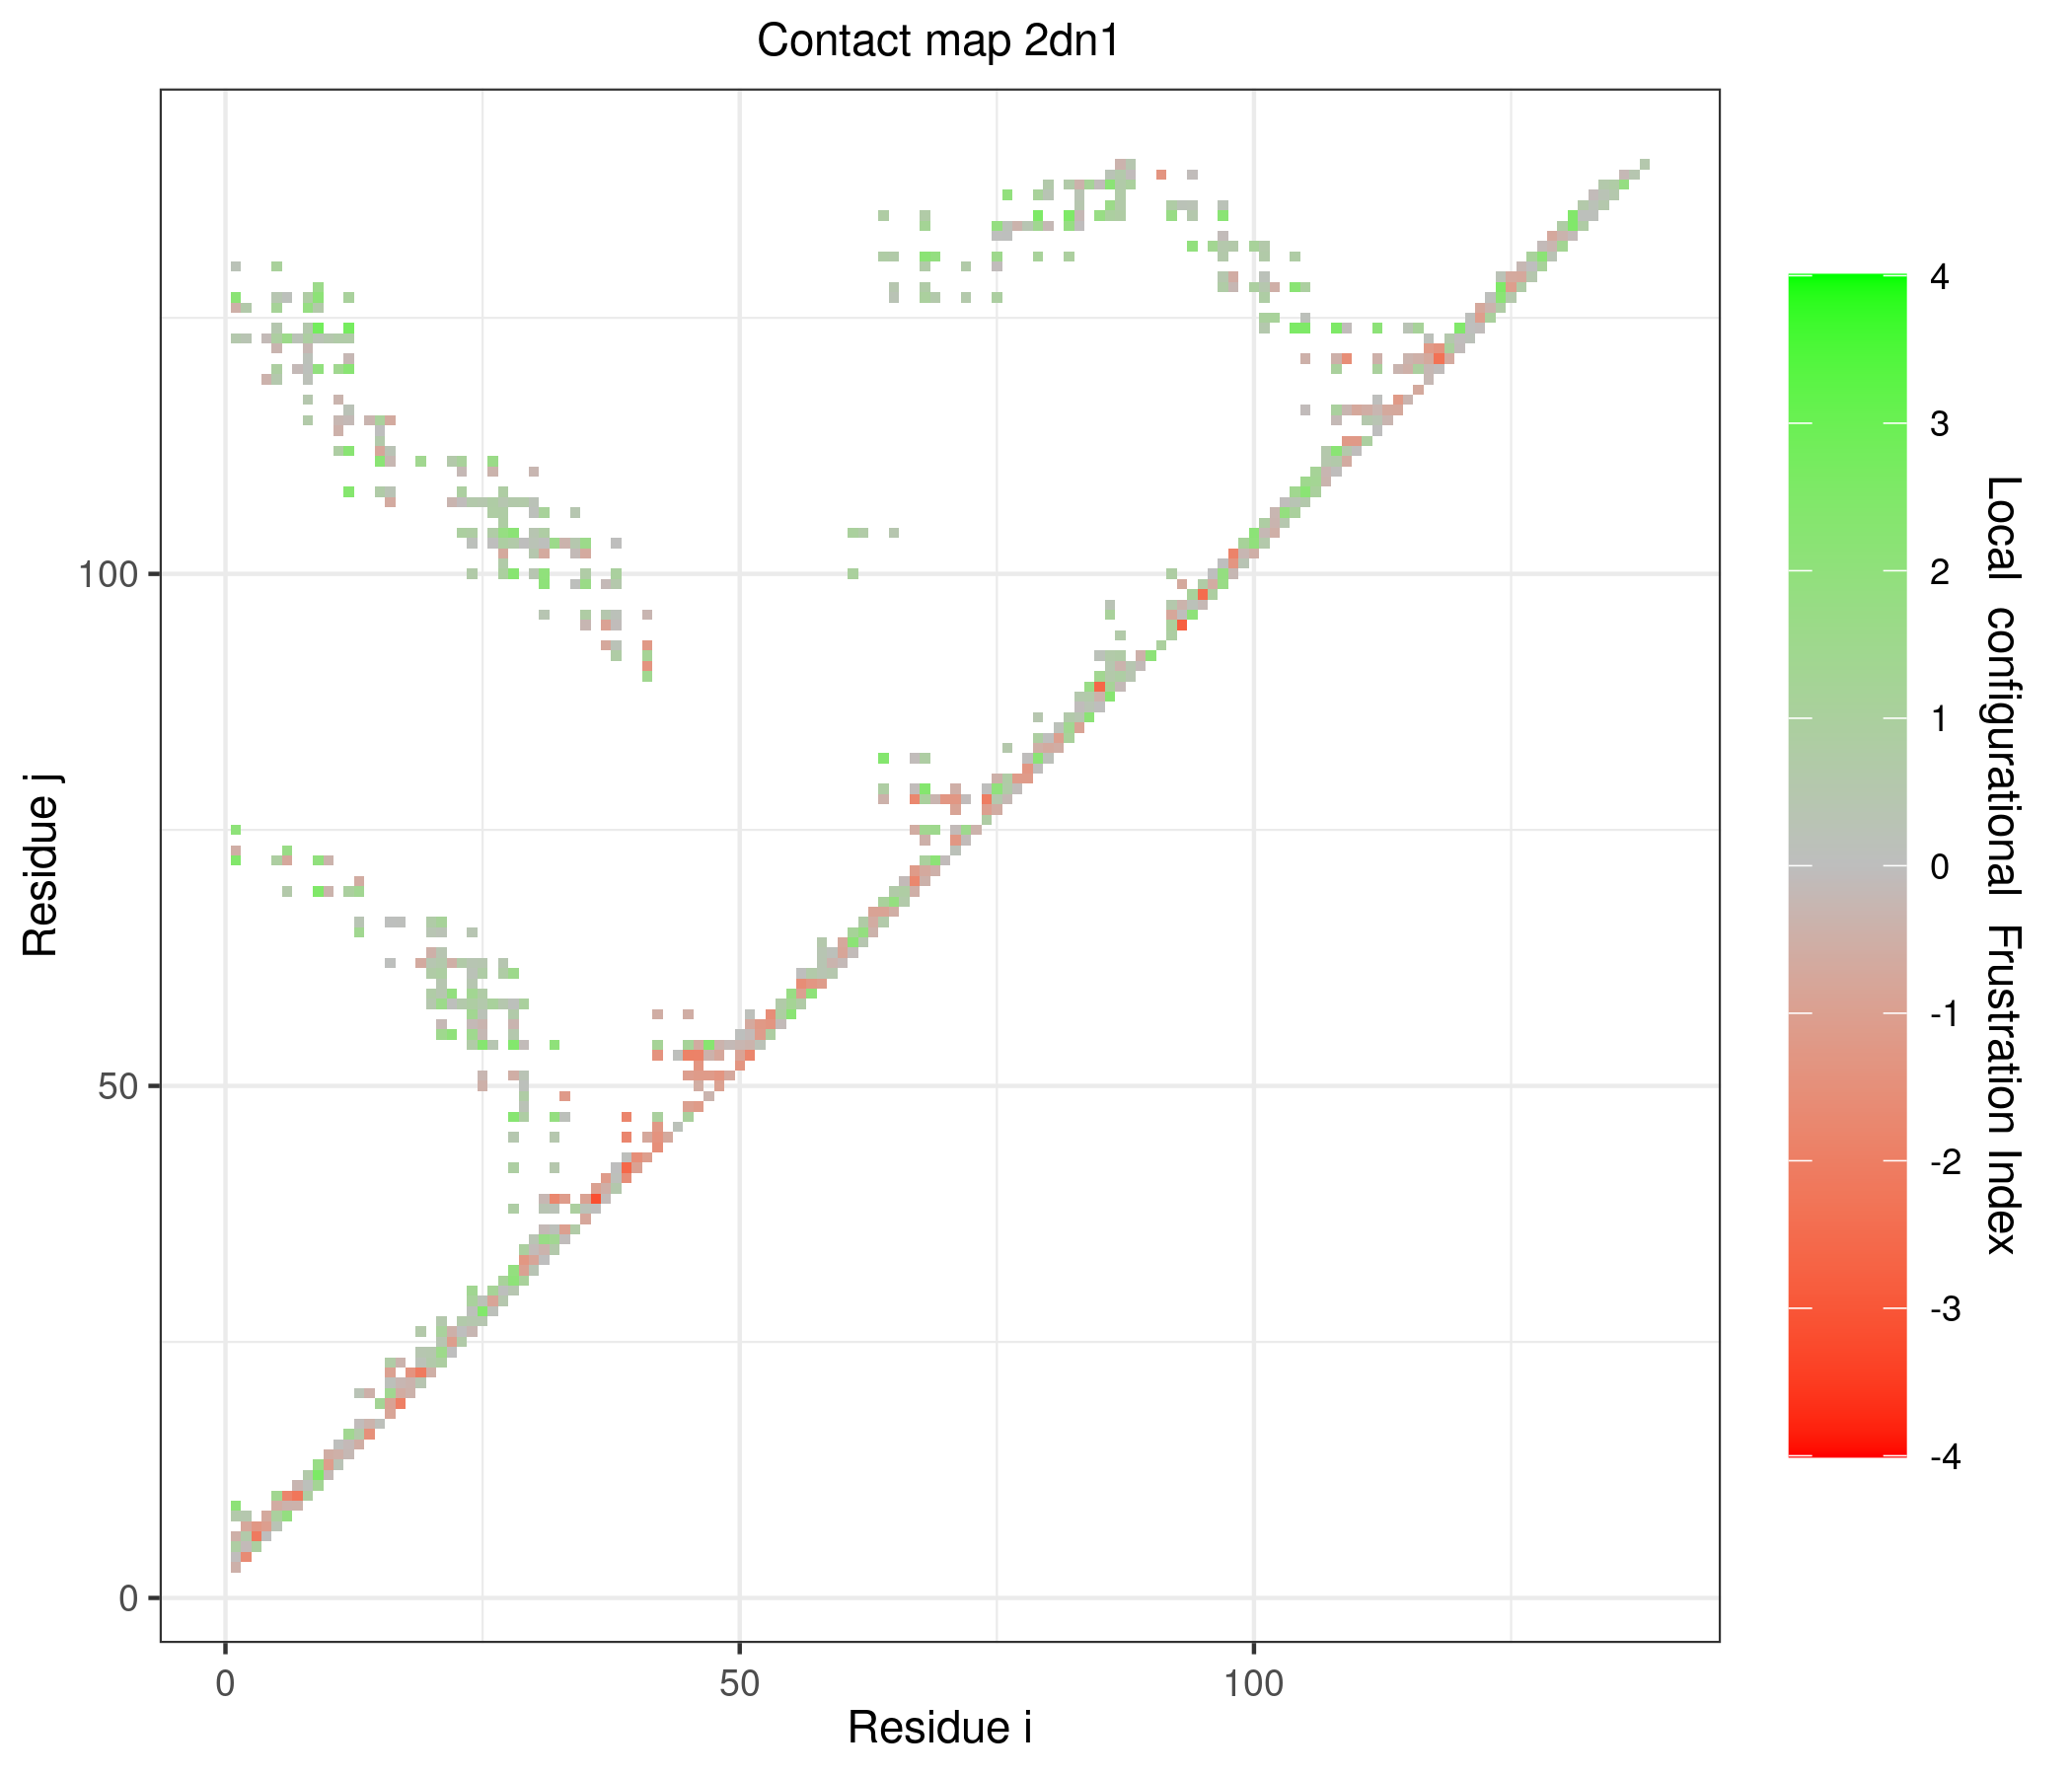

In [ ]:
from IPython.display import Image
Image('/content/Results/2dn1.done/Images/2dn1_configurational_map.png', width=600, height=400)

There are many **in vitro experiments on enzymatic proteins** that show that, if a residue belonging to the active site is mutated, **stability increases but this directly impacts on a reduction of enzymatic function**.
Can we capture this through a frustration analysis?

Let's take a look at an example, from the paper Characterization of the Global Stabilizing Substitution A77V and Its Role in the Evolution of CTX-M β-Lactamases

'Amino acid substitutions in the active site of CTX-M enzymes may change their activity and substrate specificity at the cost of stability. The A77V substitution is a stabilizing mutation that compensates for a loss in stability associated with substitutions that alter catalytic activity. The A77V substitution increases the overall thermal stability of the enzyme, allowing it to absorb a greater number of deleterious destabilizing mutations and increasing its access to alternate evolutionary paths'

https://journals.asm.org/doi/full/10.1128/AAC.00618-15

Let's get started **frustrating a beta-lactamase** (PdbID 1m6k Chain A).

In [10]:
%%R
library(frustratometeR)


# Calculate frustration for a structure to be downloaded from the PDB
Pdb_sing <- calculate_frustration(PdbID = '1m6k', Mode = "mutational", ResultsDir =  "/content/Results/", Chain="A", Graphics = TRUE)


-----------------------------Download files-----------------------------
   PDB has ALT records, taking A only, rm.alt=TRUE
-----------------------------Filtering-----------------------------
-----------------------------Preparing files-----------------------------
-----------------------------Setting options-----------------------------
-----------------------------Calculating-----------------------------
-----------------------------Reorganization-----------------------------
-----------------------------Images-----------------------------
5Adens plot is stored in /content/Results/1m6k_A.done/Images/1m6k_A_mutational.png_5Adens.png
5Adens proportion plot is stored in /content/Results/1m6k_A.done/Images/1m6k_A_mutational_5Adens_around.png
Contact map is stored in /content/Results/1m6k_A.done/Images/1m6k_A_mutational_map.png
-----------------------------Visualizations-----------------------------


****Storage information****
The frustration data was stored in /content/Results/1m6k_A.d

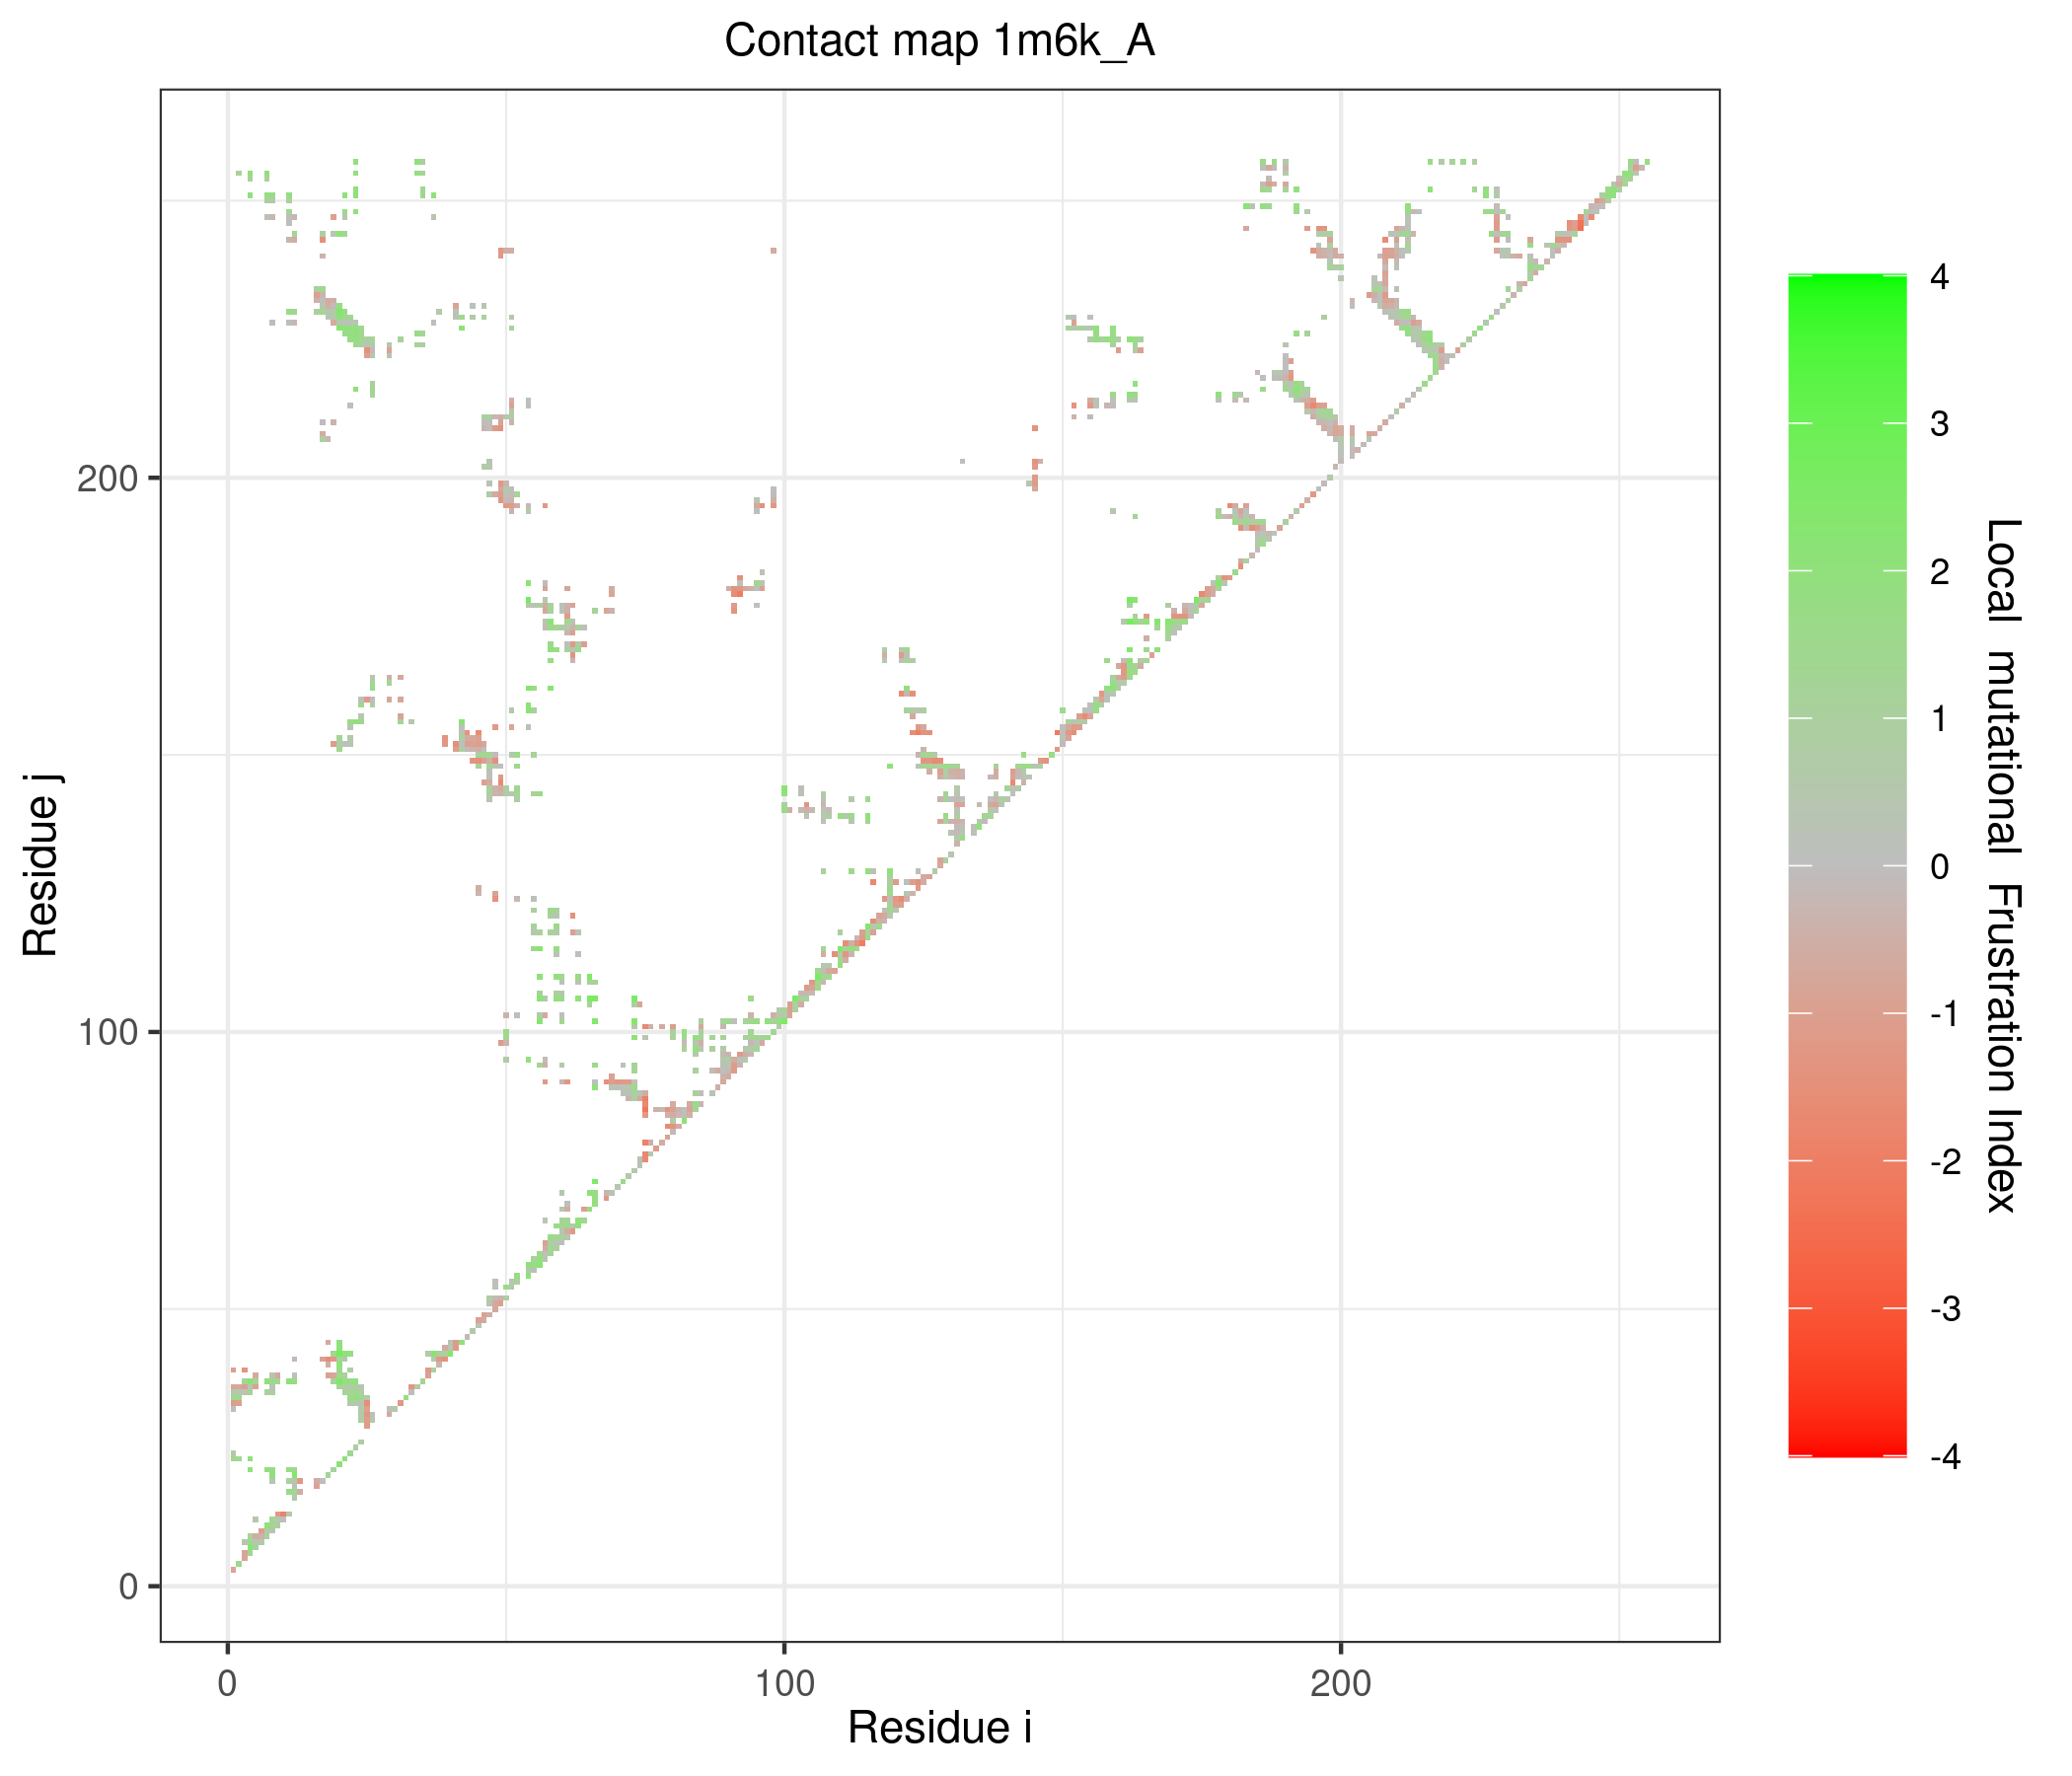

In [11]:
from IPython.display import Image
Image('/content/Results/1m6k_A.done/Images/1m6k_A_mutational_map.png', width=600, height=400)

With the new **functionalities of the FrustraR** we can predict the frustration of a **point mutation** for all frustration modes (mutational, configurational and singleresidue) in a very easy way.


In [ ]:
%%R
help(calculate_frustration)

File: /tmp/RtmpzleUDI/Rtxt1120f36b526
calculate_frustration      package:frustratometeR      R Documentation



_C_a_l_c_u_l_a_t_e _F_r_u_s_t_r_a_t_i_o_n.



_D_e_s_c_r_i_p_t_i_o_n:



     Calculates local energetic frustration for a protein structure.



_U_s_a_g_e:



     calculate_frustration(

       PdbFile = NULL,

       PdbID = NULL,

       Chain = NULL,

       Electrostatics_K = NULL,

       SeqDist = 12,

       Mode = "configurational",

       Graphics = TRUE,

       Visualization = TRUE,

       ResultsDir = NULL

     )

     

_A_r_g_u_m_e_n_t_s:



 PdbFile: Full path of the file containing the protein structure.

          Default: NULL.



   PdbID: PdbID of the protein structure. Default: NULL.



   Chain: Chain or Chains of the protein structure. Type:

          character/vector of characters. Default: NULL.



Electrostatics_K: K constant to use in the electrostatics Mode. Type:

          numeric. Default: NULL 

The following lines will mutate a given residue by all the alternative aminoacid identities and evaluate how this impact in the local energetic frustration values.

-----------------------------Filtering-----------------------------
-----------------------------Preparing files-----------------------------
-----------------------------Setting options-----------------------------
-----------------------------Calculating-----------------------------
-----------------------------Reorganization-----------------------------
-----------------------------Images-----------------------------
5Adens plot is stored in /content/Results/P01116-2_A.done/Images/P01116-2_A_mutational.png_5Adens.png
5Adens proportion plot is stored in /content/Results/P01116-2_A.done/Images/P01116-2_A_mutational_5Adens_around.png
Contact map is stored in /content/Results/P01116-2_A.done/Images/P01116-2_A_mutational_map.png
-----------------------------Visualizations-----------------------------


****Storage information****
The frustration data was stored in /content/Results/P01116-2_A.done/FrustrationData
Graphics are stored in /content/Results/P01116-2_A.done/Images
Visualization

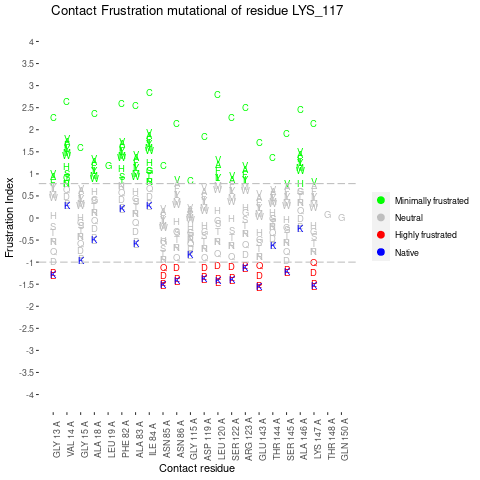

In [15]:
%%R
library(frustratometeR)

#Pdb_conf <- calculate_frustration(PdbID = "1m6k", Chain="A", Mode = 'mutational', ResultsDir = "/content/Results/")
Pdb_conf <- calculate_frustration(PdbFile = "/content/P01116-2.pdb", Chain="A", Mode = 'mutational', ResultsDir = "/content/Results/")
Pdb_conf <- mutate_res(Pdb = Pdb_conf, Resno = as.numeric(117), Chain = "A")
plot_mutate_res(Pdb = Pdb_conf, Resno = as.numeric(117), Chain = "A", Save = TRUE )

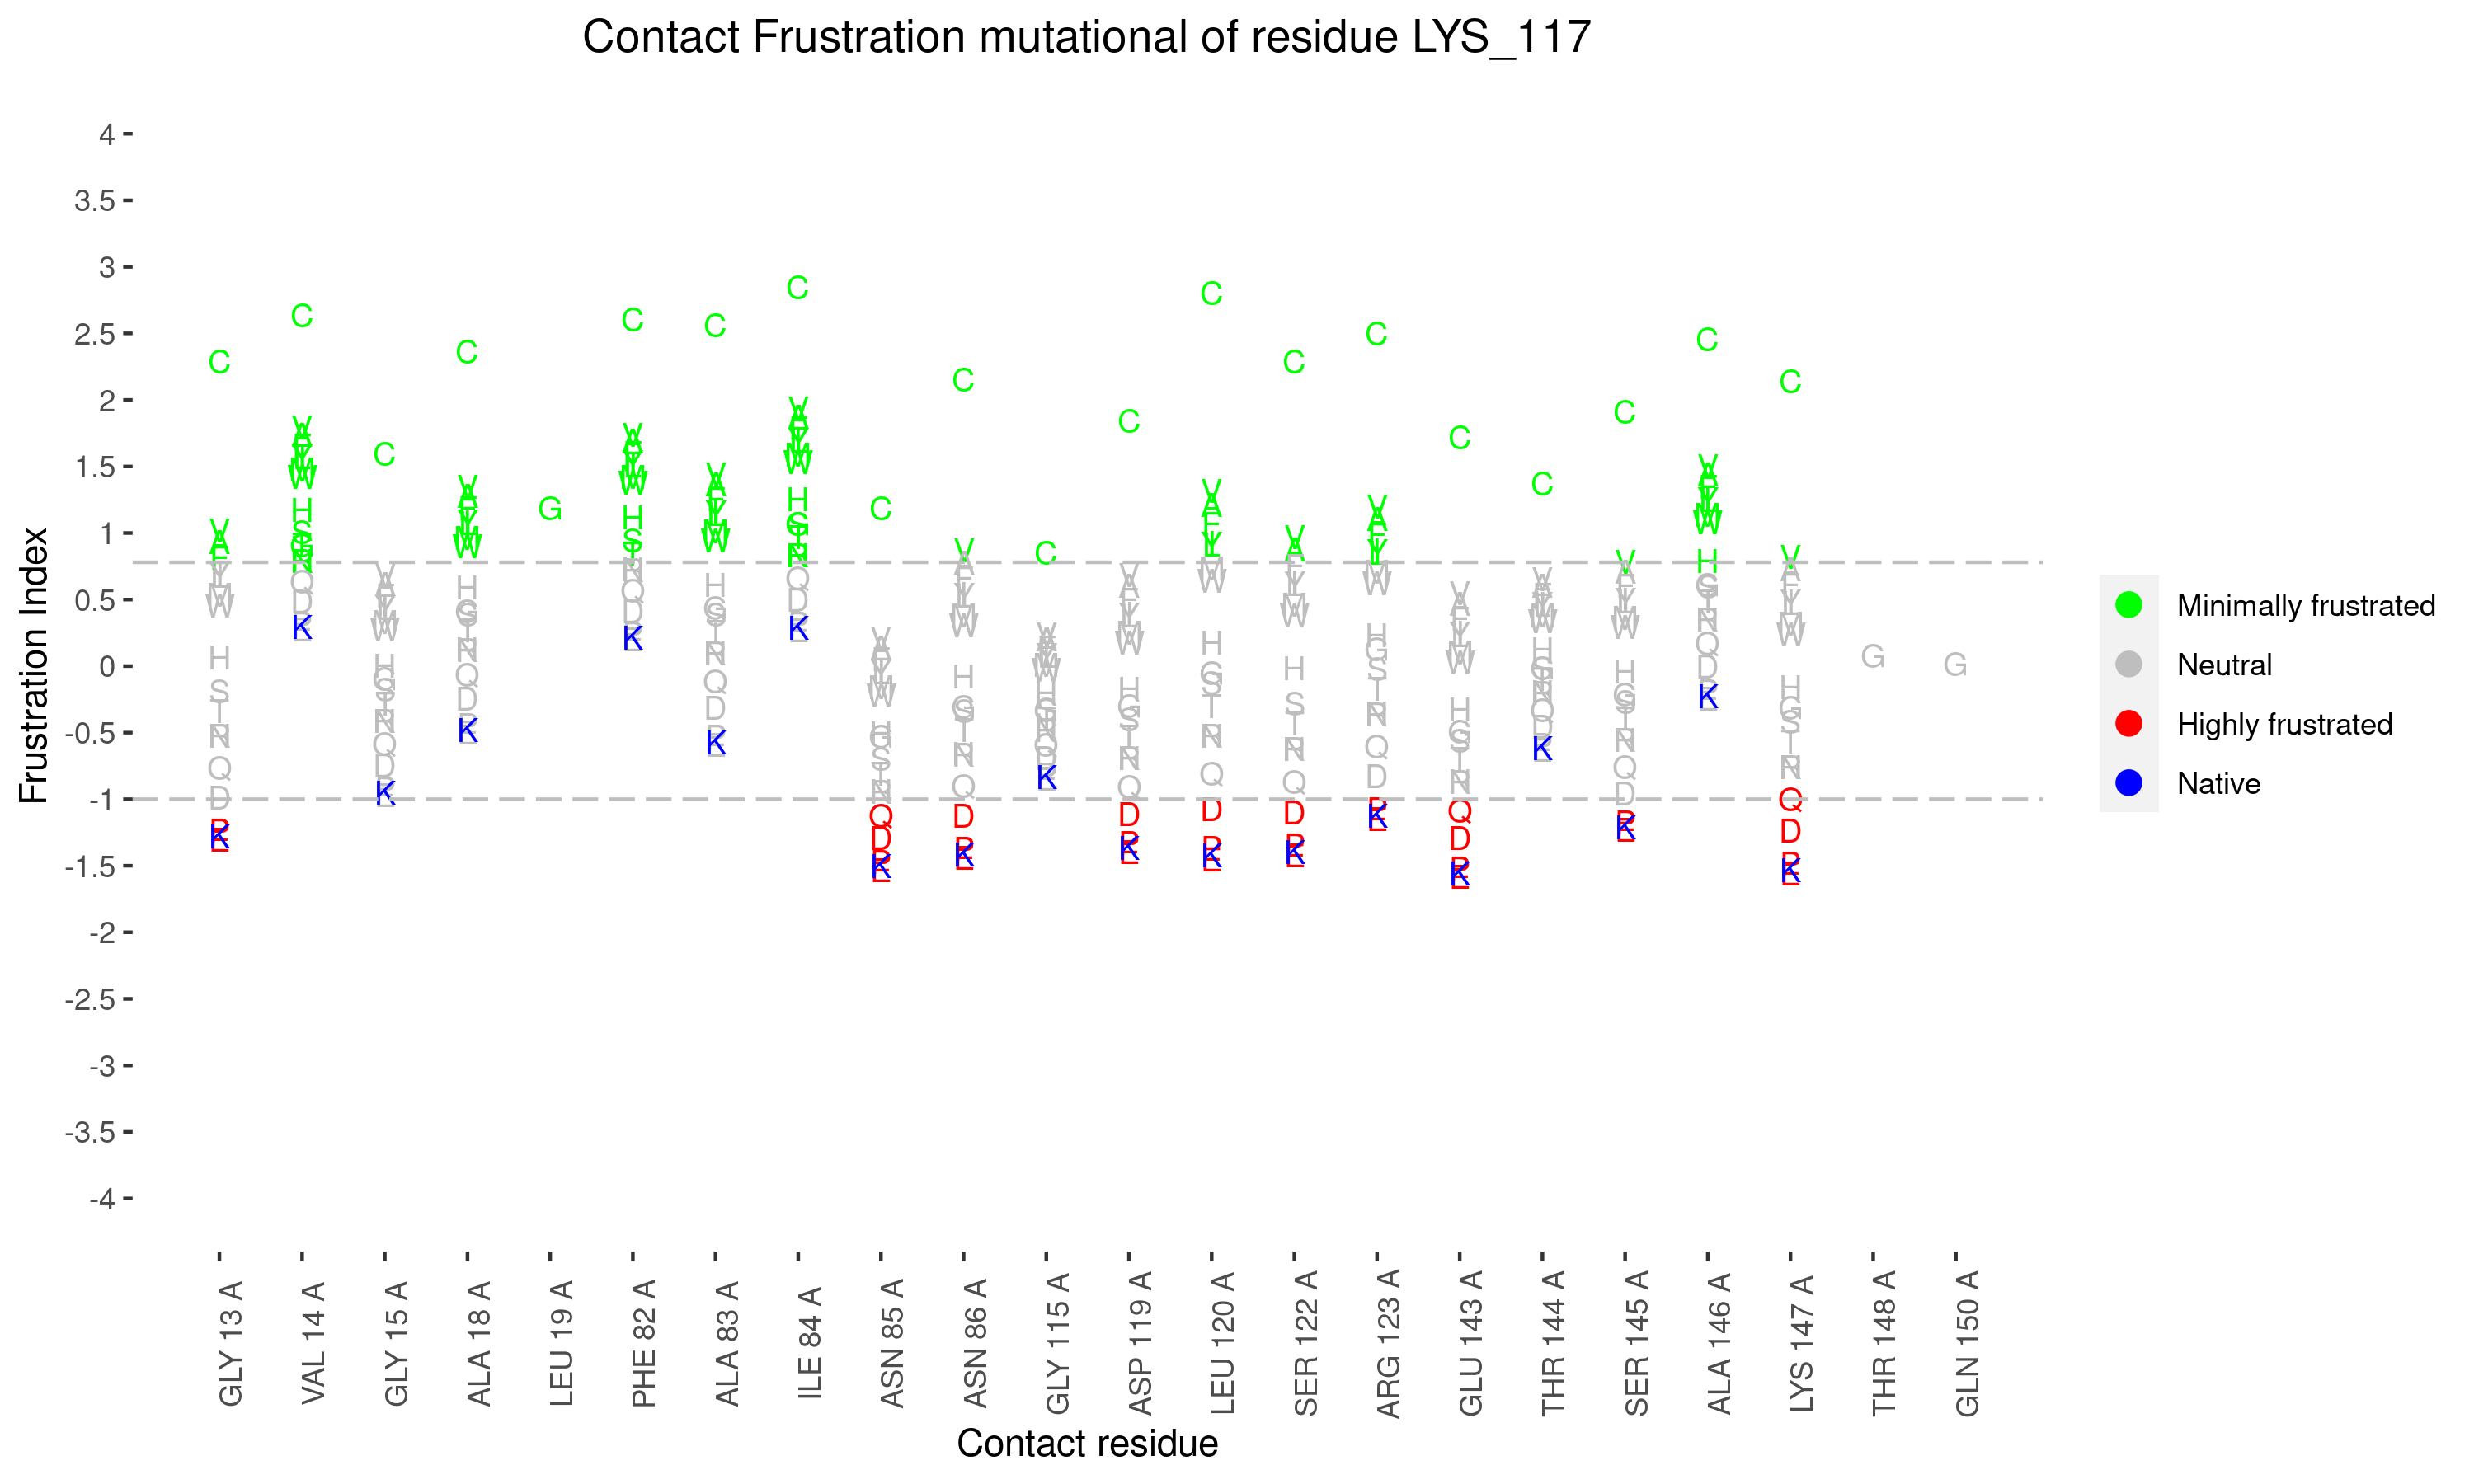

In [16]:
from IPython.display import Image
Image('/content/Results/P01116-2_A.done/MutationsData/Images/mutational_117_threading_A.png')



## How does the frustration of a residue change during the folding process?

Let's **create a folder named Dynamic** and download a zipped file containing frames from a **molecular dynamics simulation of 1n0r protein folding**.

Let's download and unzip the frames (they are in .pdb format)

In [ ]:
!gdown 1-jr_XQYzGWA-CGrdQjE6QjRjl1MO80nN -O /content/Dynamics.zip
!unzip /content/Dynamics.zip -d /content/

Downloading...
From: https://drive.google.com/uc?id=1-jr_XQYzGWA-CGrdQjE6QjRjl1MO80nN
To: /content/Dynamics.zip
100% 574k/574k [00:00<00:00, 97.6MB/s]
Archive:  /content/Dynamics.zip
   creating: /content/Dynamics/
  inflating: /content/Dynamics/1.pdb  
  inflating: /content/Dynamics/2.pdb  
  inflating: /content/Dynamics/3.pdb  
  inflating: /content/Dynamics/4.pdb  
  inflating: /content/Dynamics/5.pdb  
  inflating: /content/Dynamics/7.pdb  
  inflating: /content/Dynamics/6.pdb  
  inflating: /content/Dynamics/8.pdb  
  inflating: /content/Dynamics/9.pdb  
  inflating: /content/Dynamics/10.pdb  
  inflating: /content/Dynamics/11.pdb  
  inflating: /content/Dynamics/12.pdb  
  inflating: /content/Dynamics/13.pdb  
  inflating: /content/Dynamics/14.pdb  
  inflating: /content/Dynamics/15.pdb  
  inflating: /content/Dynamics/16.pdb  
  inflating: /content/Dynamics/17.pdb  
  inflating: /content/Dynamics/18.pdb  
  inflating: /content/Dynamics/19.pdb  
  inflating: /content/Dynamics/20.

In [ ]:
!touch /content/traj.pdb
!rm /content/traj.pdb
!for f in $(ls -1v /content/Dynamics/*pdb); do (cat "${f}"; echo) >> /content/traj.pdb; done

#@title ###Visualize trajectory
#define number of frames
import py3Dmol

view = py3Dmol.view()

view.addModelsAsFrames(open('/content/traj.pdb', 'r').read(),'pdb')

view.setStyle({'cartoon': {'color':'blue'}})

BB = ['C','O','N']
view.addStyle({'and':[{'resn':["GLY","PRO"],'invert':True},{'atom':BB,'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
view.addStyle({'and':[{'resn':"GLY"},{'atom':'CA'}]},
                        {'sphere':{'colorscheme':f"WhiteCarbon",'radius':0.3}})
view.addStyle({'and':[{'resn':"PRO"},{'atom':['C','O'],'invert':True}]},
                        {'stick':{'colorscheme':f"WhiteCarbon",'radius':0.3}})

view.zoomTo()
view.animate({'loop': "forward"})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Al igual que antes, vamos a crear un script de .r 



The results directory /content/Dynamics/Results/ has been created.

-----------------------------Object Dynamic Frustration-----------------------------
-----------------------------Calculating Dynamic Frustration-----------------------------
-----------------------------Filtering-----------------------------
-----------------------------Preparing files-----------------------------
-----------------------------Setting options-----------------------------
-----------------------------Calculating-----------------------------
-----------------------------Reorganization-----------------------------
-----------------------------Images-----------------------------
5Adens plot is stored in /content/Dynamics/Results/1.done/Images/1_configurational.png_5Adens.png
5Adens proportion plot is stored in /content/Dynamics/Results/1.done/Images/1_configurational_5Adens_around.png
Contact map is stored in /content/Dynamics/Results/1.done/Images/1_configurational_map.png
-----------------------------Vis

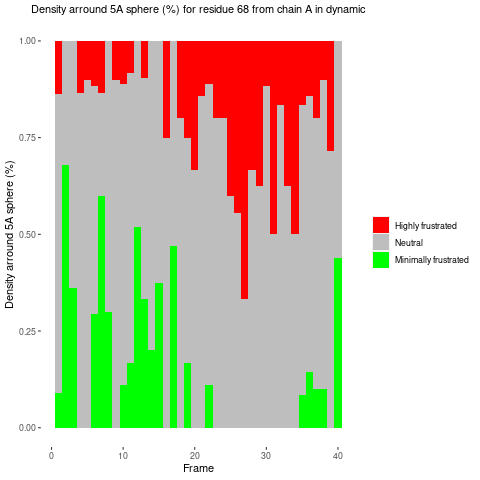

In [ ]:
%%R
library('frustratometeR')
OrderList <- c()
for(i in as.numeric(1):as.numeric(40)){OrderList <- c(OrderList, paste( i, ".pdb", sep = ""))}
Dynamic_conf <- dynamic_frustration(PdbsDir = '/content/Dynamics/', OrderList = OrderList, ResultsDir = "/content/Dynamics/Results/")

# Analyzing residue Resno
Dynamic_conf <- dynamic_res(Dynamic = Dynamic_conf, Resno = as.numeric(68), Chain = "A", Graphics = TRUE)

#Visualisations
plot_dynamic_res_5Adens_proportion(Dynamic = Dynamic_conf, Resno = as.numeric(68), Chain = "A")

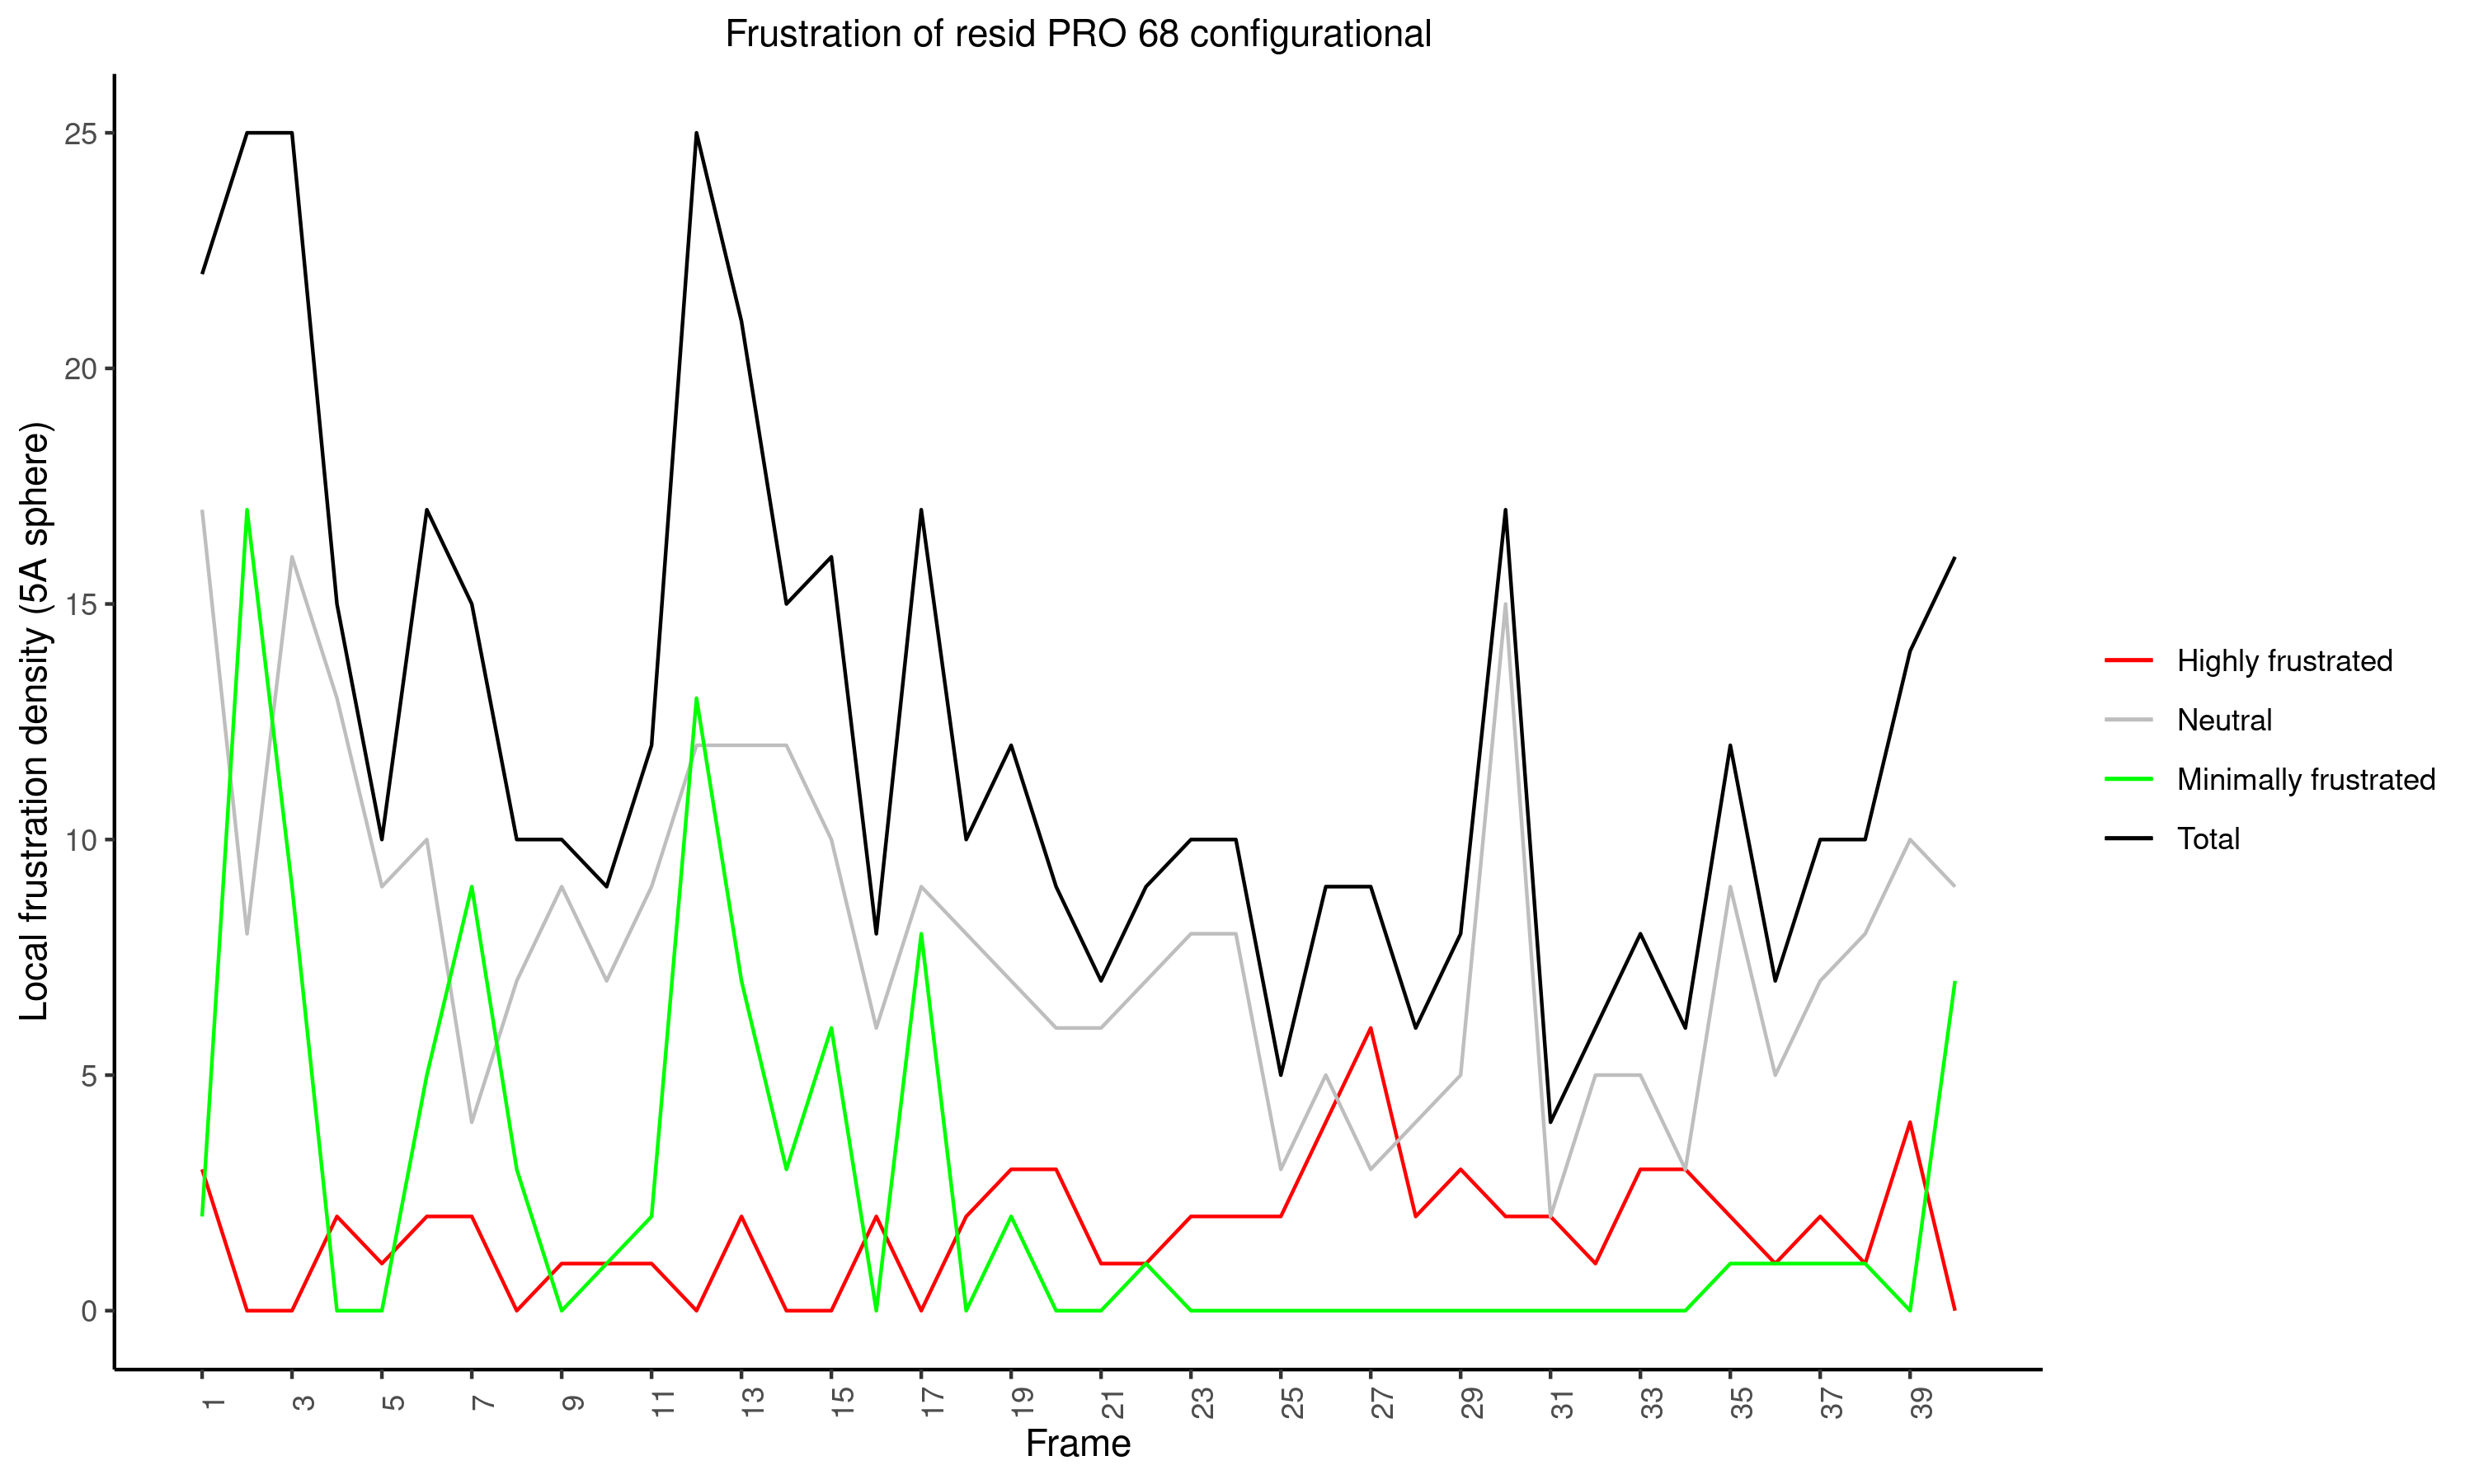

In [ ]:
from IPython.display import Image
Image('/content/Dynamics/Results/Dynamic_plots_res_68_A/dynamic5adens_configurational_Res68.png')


*Now* that frustration values were calculated for a given residue for all the frames we can track its evolution as a function of the frame order (usually simulation time) Let's see!
